<a href="https://colab.research.google.com/github/Atharvasp333/AQI-analyzer/blob/main/MLexp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report,roc_curve, auc

# Load the dataset
df = pd.read_csv('expanded_student_performance.csv')

# Display first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Hours_Studied  Attendance  Assignment_Score  Midterm_Score  Final_Score
0              1          60                55             50           52
1              2          65                58             55           57
2              3          70                60             58           60
3              4          75                65             62           64
4              5          80                68             65           68


In [ ]:
# Define Features (X) and Target (y)
X = df[['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score']]
y = df['Final_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

# Initialize and Train the Model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Make Predictions
y_pred = lin_model.predict(X_test)

# Evaluation
print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared (R2 Score): {r2_score(y_test, y_pred):.2f}")
print(f"Coefficients: {lin_model.coef_}")
print(f"Intercept: {lin_model.intercept_:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 2.26
R-squared (R2 Score): 0.99
Coefficients: [0.44531054 0.04058829 0.16006866 0.75653262]
Intercept: 2.26


--- Logistic Regression Results ---
Accuracy Score: 0.98

Confusion Matrix:
[[13  0]
 [ 1 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.97      0.98        30

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43



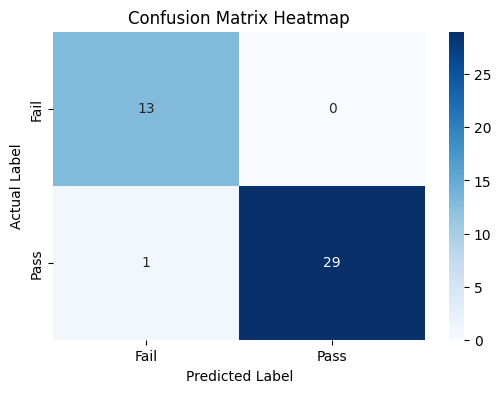

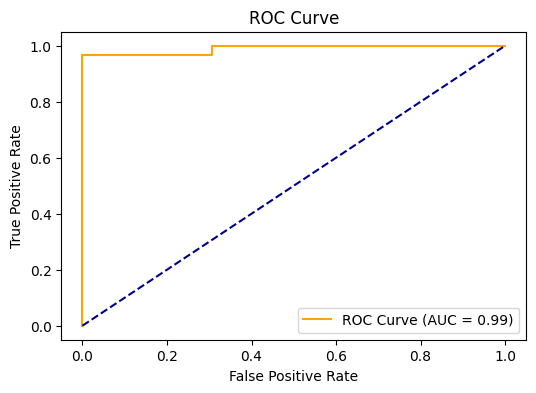

In [ ]:
# Create a binary classification target
df['Pass'] = (df['Final_Score'] >= 70).astype(int)

# Define Features (X) and Target (y)
X_log = df[['Hours_Studied', 'Attendance', 'Assignment_Score', 'Midterm_Score']]
y_log = df['Pass']

# Split the data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.43, random_state=50)

# Initialize and Train the Model
log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)

# Make Predictions
y_pred_log = log_model.predict(X_test_log)

# Evaluation
print("--- Logistic Regression Results ---")
print(f"Accuracy Score: {accuracy_score(y_test_log, y_pred_log):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_log, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))

cm = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

y_probs = log_model.predict_proba(X_test_log)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_log, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

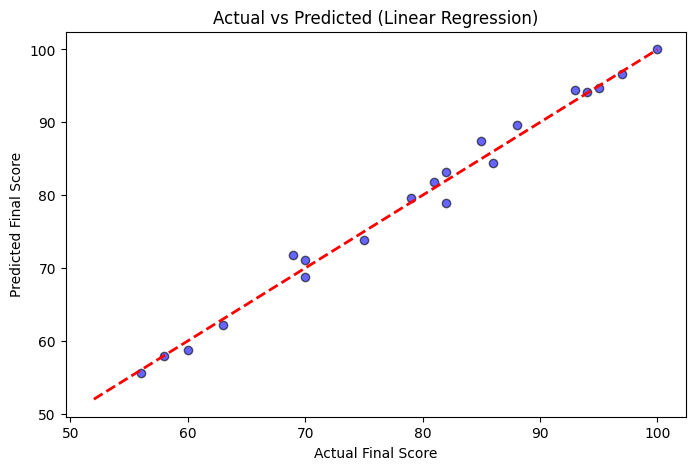

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()